In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
train_df = pd.read_csv('mitbih_train.csv', header=None)

In [8]:
train_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
85457,0.792079,0.715700,0.636492,0.531825,0.424328,0.285714,0.198020,0.128713,0.094767,0.097595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
25356,0.958101,0.793296,0.553073,0.424581,0.259777,0.136872,0.055866,0.036313,0.025140,0.013966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53693,0.771883,0.663130,0.506631,0.281167,0.145889,0.084881,0.068966,0.039788,0.023873,0.015915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49904,1.000000,0.950980,0.637255,0.203431,0.149510,0.186275,0.120098,0.063725,0.071078,0.071078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32244,0.990826,0.857798,0.655963,0.339450,0.162844,0.103211,0.126147,0.082569,0.096330,0.068807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67058,1.000000,0.886991,0.382392,0.045992,0.243101,0.244415,0.198423,0.201051,0.199737,0.193167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65909,0.839662,0.784810,0.588608,0.308017,0.126582,0.082278,0.059072,0.048523,0.042194,0.023207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46800,1.000000,0.799270,0.521898,0.197080,0.014599,0.007299,0.062044,0.131387,0.109489,0.127737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27015,1.000000,0.881163,0.402023,0.000000,0.176991,0.198483,0.132743,0.128951,0.139064,0.137800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34526,0.484424,0.376947,0.225857,0.196262,0.202492,0.188474,0.204050,0.205607,0.197819,0.213396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_df.isna().sum().sum()

0

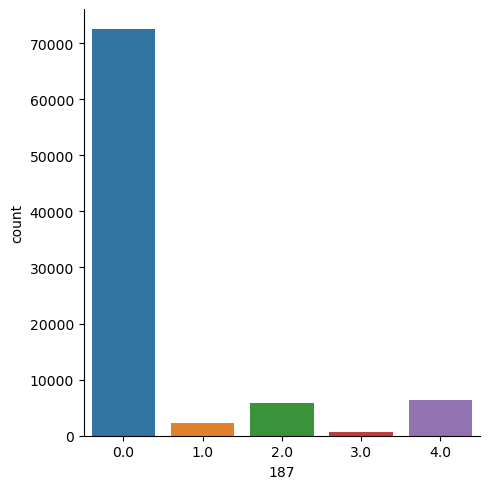

In [32]:
sns.catplot(x=187, kind='count', data=train_df);

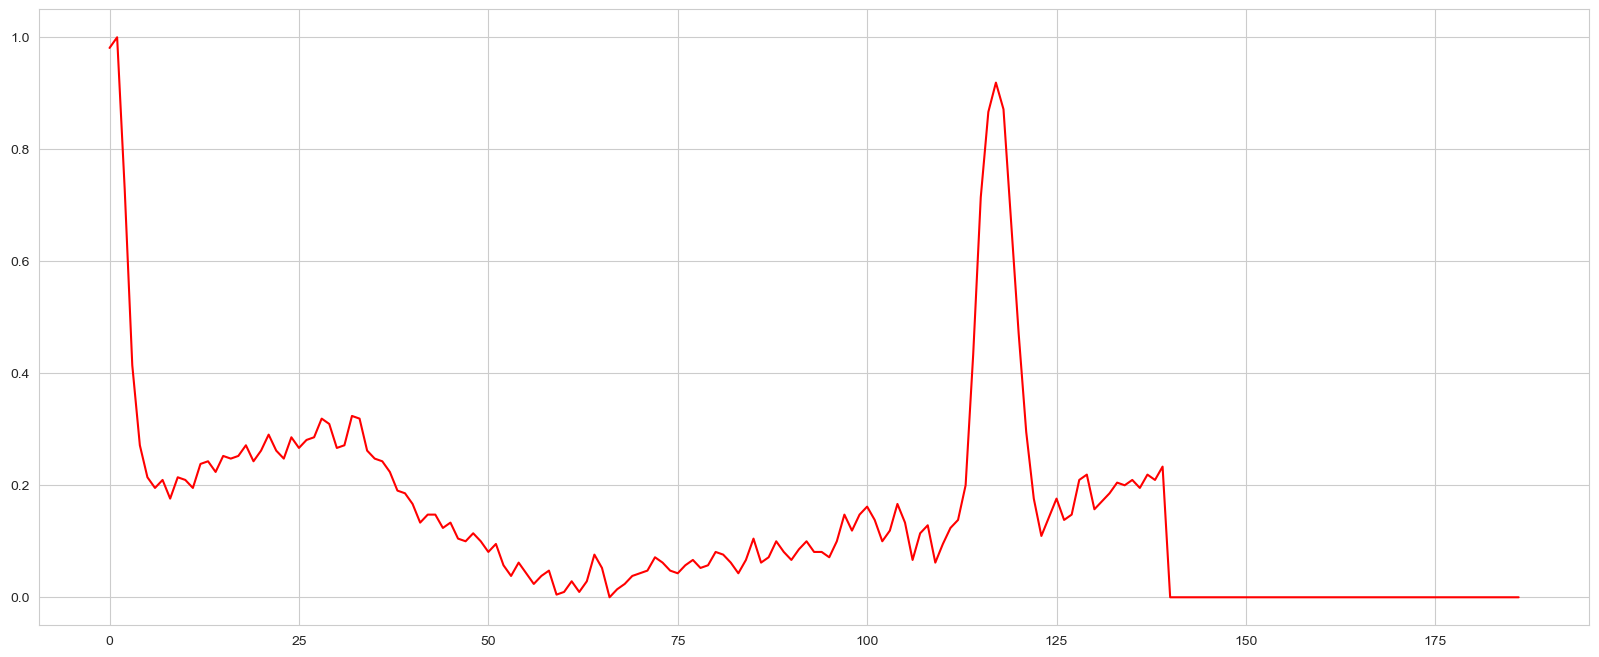

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 8))
plt.plot(train_df.sample().iloc[0, :-1], color='red')
plt.show();

In [43]:
class0_df = train_df[train_df[187] == 0]
class1_df = train_df[train_df[187] == 1]
class2_df = train_df[train_df[187] == 2]
class3_df = train_df[train_df[187] == 3]
class4_df = train_df[train_df[187] == 4]

In [47]:
class2_df[187].head()

74694    2.0
74695    2.0
74696    2.0
74697    2.0
74698    2.0
Name: 187, dtype: float64

In [49]:
from sklearn.utils import resample

class1_up_sampled = resample(class1_df, n_samples=20000, replace=True, random_state=1)
class2_up_sampled = resample(class2_df, n_samples=20000, replace=True, random_state=1)
class3_up_sampled = resample(class3_df, n_samples=20000, replace=True, random_state=1)
class4_up_sampled = resample(class4_df, n_samples=20000, replace=True, random_state=1)

class0_down_sampled = class0_df.sample(n=20000, random_state=0)

In [50]:
train_df_resampled = pd.concat(
    [class0_down_sampled, class1_up_sampled, class2_up_sampled, class3_up_sampled, class4_up_sampled]
)

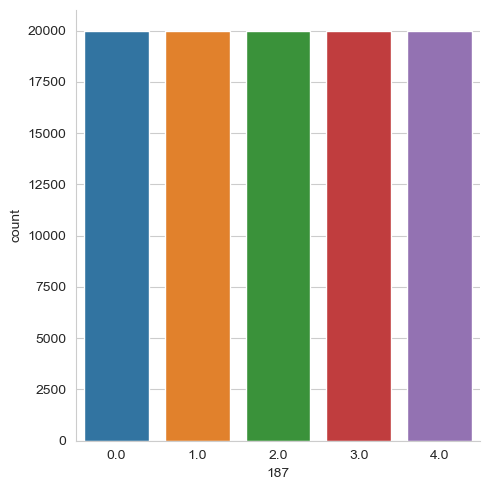

In [52]:
sns.catplot(x = 187, kind = 'count', data = train_df_resampled);

In [53]:
train_df_resampled.to_csv("mitbih_train_resampled.csv")

In [58]:
(train_df_resampled.iloc[0, -1],
train_df_resampled.iloc[20_000, -1],
train_df_resampled.iloc[40_000, -1],
train_df_resampled.iloc[60_000, -1],
train_df_resampled.iloc[80_000, -1],)

(0.0, 1.0, 2.0, 3.0, 4.0)